In [218]:
##the dataset for NYC Taxi Fares is taken from kaggle
##https://www.kaggle.com/c/new-york-city-taxi-fare-prediction

In [1]:
import torch 
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
torch.__version__

'1.7.0'

In [3]:
pwd

'C:\\Users\\SEEMA YADAV\\Desktop\\AI-MachineLearning\\02-ANN-Artificial-Neural-Networks'

In [4]:
df=pd.read_csv('C:\\Users\\SEEMA YADAV\\Desktop\\NYCTaxiFares.csv')

In [5]:
df.head(3)

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2


In [6]:
df['fare_class'].unique()

array([0, 1], dtype=int64)

In [7]:
def haversine_distance(df,lat1,long1,lat2,long2):
    r=6371
    
    phi1=np.radians(df[lat1])
    phi2=np.radians(df[lat2])
    lambda1=np.radians(df[long1])
    lambda2=np.radians(df[long2])
    delta_phi=np.radians(df[lat2]-df[lat1])
    delta_lambda=np.radians(df[long2]-df[long1])
    b=np.sin(delta_phi/2)**2+np.cos(phi1)*np.cos(phi2)*np.sin(delta_lambda/2)**2
    c=2*np.arctan2(np.sqrt(b),np.sqrt(1-b))
    d=r*c

    return d

In [8]:
df['dist_km']=haversine_distance(df,'pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude')

In [51]:
df.head(5)

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdata,hour,week_day,amorpm
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,Mon,am
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,Sat,am
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,Sat,am
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,Sun,pm
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,Sat,pm


In [14]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])

In [15]:
df['EDTdata']=df['pickup_datetime']-pd.Timedelta(hours=4)

In [16]:
df

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdata,hour
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22
...,...,...,...,...,...,...,...,...,...,...,...
119995,2010-04-18 14:33:03+00:00,15.3,1,-73.955857,40.784590,-73.981941,40.736789,1,5.751348,2010-04-18 10:33:03+00:00,10
119996,2010-04-23 10:27:48+00:00,15.3,1,-73.996329,40.772727,-74.049890,40.740413,1,5.767444,2010-04-23 06:27:48+00:00,6
119997,2010-04-18 18:50:40+00:00,12.5,1,-73.988574,40.749772,-74.011541,40.707799,3,5.052523,2010-04-18 14:50:40+00:00,14
119998,2010-04-13 08:14:44+00:00,4.9,0,-74.004449,40.724529,-73.992697,40.730765,1,1.208923,2010-04-13 04:14:44+00:00,4


In [17]:
df['hour']=df['EDTdata'].dt.hour

In [18]:
df['week_day']=df['pickup_datetime'].dt.strftime('%a')

In [19]:
df['amorpm']=np.where(df['hour']<12,'am','pm')

In [20]:
df.head(5)

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdata,hour,week_day,amorpm
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,Mon,am
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,Sat,am
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,Sat,am
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,Sun,pm
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,Sat,pm


In [110]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdata', 'hour', 'week_day', 'amorpm'],
      dtype='object')

In [121]:
cat_cols=['hour', 'week_day','amorpm']
cont_cols=['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude', 'passenger_count', 'dist_km']
y_col=['fare_class']

In [122]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdata              datetime64[ns, UTC]
hour                            category
week_day                        category
amorpm                          category
dtype: object

In [123]:
for col in cat_cols:
    df[col]=df[col].astype('category')

In [124]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdata              datetime64[ns, UTC]
hour                            category
week_day                        category
amorpm                          category
dtype: object

In [125]:
df['hour'].cat.categories

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64')

In [202]:
df['week_day'].cat.codes

0         1
1         2
2         2
3         3
4         2
         ..
119995    3
119996    0
119997    3
119998    5
119999    2
Length: 120000, dtype: int8

In [127]:
hr=df['hour'].cat.codes.values
ampm=df['amorpm'].cat.codes.values
week=df['week_day'].cat.codes.values

In [142]:
cats= np.stack([hr,week,ampm],axis=1)

In [143]:
cats

array([[ 4,  1,  0],
       [11,  2,  0],
       [ 7,  2,  0],
       ...,
       [14,  3,  1],
       [ 4,  5,  0],
       [12,  2,  1]], dtype=int8)

In [144]:
cats=torch.tensor(cats,dtype=torch.int64)

In [145]:
cats

tensor([[ 4,  1,  0],
        [11,  2,  0],
        [ 7,  2,  0],
        ...,
        [14,  3,  1],
        [ 4,  5,  0],
        [12,  2,  1]])

In [146]:
cont_cols

['pickup_latitude',
 'pickup_longitude',
 'dropoff_latitude',
 'dropoff_longitude',
 'passenger_count',
 'dist_km']

In [147]:
conts=np.stack([df[col].values for col in cont_cols],axis=1)

In [148]:
conts

array([[ 40.730521  , -73.992365  ,  40.744746  , -73.975499  ,
          1.        ,   2.12631159],
       [ 40.740558  , -73.990078  ,  40.744114  , -73.974232  ,
          1.        ,   1.39230687],
       [ 40.751118  , -73.994149  ,  40.766235  , -73.960064  ,
          2.        ,   3.32676344],
       ...,
       [ 40.749772  , -73.988574  ,  40.707799  , -74.011541  ,
          3.        ,   5.05252282],
       [ 40.724529  , -74.004449  ,  40.730765  , -73.992697  ,
          1.        ,   1.20892296],
       [ 40.77192   , -73.955415  ,  40.763015  , -73.967623  ,
          3.        ,   1.42739869]])

In [149]:
conts=torch.FloatTensor(conts)

In [150]:
conts

tensor([[ 40.7305, -73.9924,  40.7447, -73.9755,   1.0000,   2.1263],
        [ 40.7406, -73.9901,  40.7441, -73.9742,   1.0000,   1.3923],
        [ 40.7511, -73.9941,  40.7662, -73.9601,   2.0000,   3.3268],
        ...,
        [ 40.7498, -73.9886,  40.7078, -74.0115,   3.0000,   5.0525],
        [ 40.7245, -74.0044,  40.7308, -73.9927,   1.0000,   1.2089],
        [ 40.7719, -73.9554,  40.7630, -73.9676,   3.0000,   1.4274]])

In [151]:
y=torch.tensor(df['fare_class'].values.reshape(-1,1),dtype=torch.int64).flatten()

In [152]:
y

tensor([0, 0, 1,  ..., 1, 0, 0])

In [153]:
cat_cols

['hour', 'week_day', 'amorpm']

In [154]:
cat_szs=[len(df[col].cat.categories) for col in cat_cols]
cat_szs

[24, 7, 2]

In [155]:
embed_szs=[(size,min(50,(size+1)//2)) for size in cat_szs]

In [156]:
embed_szs

[(24, 12), (7, 4), (2, 1)]

In [157]:
class tabular_model(nn.Module):
    
    def __init__(self,embed_szs,n_cont,out_szs,layers,p=0.5):
        super().__init__()
        self.embeds=nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in embed_szs])
        self.dropout=nn.Dropout(p)
        
        self.batch_norm=nn.BatchNorm1d(n_cont)
        
        layer_list=[]
        cat_features=sum((nf for ni,nf in embed_szs))
        features=cat_features+n_cont
        
        for i in layers:
            layer_list.append(nn.Linear(features,i))
            layer_list.append(nn.ReLU(inplace=True))
            layer_list.append(nn.BatchNorm1d(i))
            layer_list.append(nn.Dropout(p))
            features=i
        layer_list.append(nn.Linear(layers[-1],out_szs))
        self.layers=nn.Sequential(*layer_list)
        
    def forward(self,x_cat,x_cont):
        embedding=[]
        for i,e in enumerate(self.embeds):
            embedding.append(e(x_cat[:,i]))
        x=torch.cat(embedding,axis=1)
        x=self.dropout(x)
        
        x_cont=self.batch_norm(x_cont)
        
        x=torch.cat([x,x_cont],axis=1)
        x=self.layers(x)
        return x

In [158]:
conts.shape

torch.Size([120000, 6])

In [159]:
model=tabular_model(embed_szs,conts.shape[1],2,[200,100],p=0.4)

In [160]:
model

tabular_model(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(7, 4)
    (2): Embedding(2, 1)
  )
  (dropout): Dropout(p=0.4, inplace=False)
  (batch_norm): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=2, bias=True)
  )
)

In [161]:
batch_size=60000
test_size=12000

cat_train=cats[:batch_size-test_size]
cat_test=cats[batch_size-test_size:batch_size]
con_train=conts[:batch_size-test_size]
con_test=conts[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [162]:
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [163]:
import time
start_time = time.time()

epochs = 300
losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, con_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the tim

epoch:   1  loss: 0.81871438
epoch:  26  loss: 0.38593823
epoch:  51  loss: 0.33629325
epoch:  76  loss: 0.31488603
epoch: 101  loss: 0.30249944
epoch: 126  loss: 0.29285422
epoch: 151  loss: 0.28643560
epoch: 176  loss: 0.28109577
epoch: 201  loss: 0.27529410
epoch: 226  loss: 0.27040705
epoch: 251  loss: 0.26389286
epoch: 276  loss: 0.25962326
epoch: 300  loss: 0.25724676

Duration: 2841 seconds


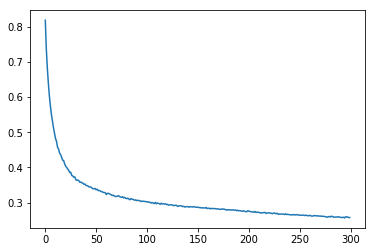

In [164]:
plt.plot(range(epochs),losses)

In [165]:
with torch.no_grad():
    test_pred=model.forward(cat_test,con_test)
    loss=criterion(test_pred,y_test)
    print(loss)

tensor(0.2507)


In [166]:
##if the loss on test set is more then you are overfitting on the training set 

In [170]:
con_test[0]

tensor([ 40.7834, -73.9528,  40.7822, -73.9560,   1.0000,   0.2935])

In [194]:
correct=0
for i in range(50):
    if test_pred[i].argmax().item()==y_test[i].item():
        correct+=1
print(correct)

46


In [195]:
if len(losses)==epochs:
    torch.save(model.state_dict(),'taxifareclassmodel.pt')
else:
    print('model has not been trained')

In [196]:
new_model=tabular_model(embed_szs,6,2,[200,100],0.5)

In [199]:
new_model.load_state_dict(torch.load('taxifareclassmodel.pt'))
new_model.eval()

tabular_model(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(7, 4)
    (2): Embedding(2, 1)
  )
  (dropout): Dropout(p=0.5, inplace=False)
  (batch_norm): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.5, inplace=False)
    (8): Linear(in_features=100, out_features=2, bias=True)
  )
)

In [200]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdata', 'hour', 'week_day', 'amorpm'],
      dtype='object')

In [215]:
def test_data(model):
    plong=float(input('pls enter pickup longitude'))
    plat=float(input('pls enter pickup latitude'))
    dlong=float(input('pls enter dropoff longitude'))
    dlat=float(input('pls enter dropoff latitude'))
    psngr=int(input('how many passengers'))
    dt = input('What is the pickup date and time?\nFormat as YYYY-MM-DD HH:MM:SS')
    dic={'pickup_longitude':plong,'pickup_latitude':plat,'dropoff_longitude':dlong,'dropoff_latitude':dlat,
        'passenger':psngr,'pickup_datetime':dt}

    test=pd.DataFrame(data=dic,index=[0])
    test['distkm']=haversine_distance(test,'pickup_latitude','pickup_longitude','dropoff_latitude','dropoff_longitude')
    test['EDTdate']=pd.to_datetime(test['pickup_datetime'])
    
    test['hour']=test['EDTdate'].dt.hour
    test['ampm']=np.where(test['hour']<12,0,1)
    test['week_day']=test['EDTdate'].dt.strftime('%a')
    test['week_day']=test['week_day'].replace(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'],
                                              [0,1,2,3,4,5,6]).astype('int64')
    cat_cols=['hour','week_day','ampm']
    cont_cols=['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 
               'dropoff_longitude', 'passenger', 'distkm']
    
    test_cat=np.stack([test[col].values for col in cat_cols],axis=1)
    test_cat=torch.tensor(test_cat,dtype=torch.int64)
    test_cont=np.stack([test[col].values for col in cont_cols],axis=1)
    test_cont=torch.tensor(test_cont,dtype=torch.float)
    
    with torch.no_grad():
        z=model.forward(test_cat,test_cont).argmax().item()
        
    return z

In [216]:
test_data(new_model)

pls enter pickup longitude-73.9
pls enter pickup latitude40.5
pls enter dropoff longitude-73.92
pls enter dropoff latitude40.52
how many passengers2
What is the pickup date and time?
Format as YYYY-MM-DD HH:MM:SS2010-04-15 16:00:00


1